In [ ]:
!git clone https://github.com/AhmadM-DL/Intermodel-Interpretation

In [1]:
%cd Intermodel-Interpretation/

/content/Intermodel-Interpretation


In [2]:
import pandas as pd
import numpy as np

In [4]:
from Scripts.utilities import *

# Load and Preprocess Data

In [5]:
# Load Perfomrance Data
performance_data = pd.read_csv("./Data/models_performance_on_tasks.csv")
# Drop useless columns
performance_data.drop([c for c in performance_data.columns if "Unnamed" in c], inplace=True, axis=1)
performance_data.head()

,model,dt_ImageNet,dt_Aircraft,dt_Caltech101,dt_Cars,dt_CIFAR10,dt_CIFAR100,dt_DTD,dt_Flowers,dt_Food,dt_Pets,dt_SUN397,dt_VOC2007,dt_Avg.,voc_forzen_ap,voc_forzen_ap_50,voc_forzen_ap_75,voc_tuned_ap,voc_tuned_ap_50,voc_tuned_ap_75,ISIC_5_shot,ISIC_20_shot,ISIC_50_shot,ChestX_5_shot,ChestX_20_shot,ChestX_50_shot,CropDiseases_5_shot,CropDiseases_20_shot,CropDiseases_50_shot,EuroSAT_5_shot,EuroSAT_20_shot,EuroSAT_50_shot,sne_Mean,sne_Median,sne_11.25,sne_22.5,sne_30
0,InsDis(R),59.5,36.88,71.55,30.49,80.57,59.87,68.24,83.17,63.45,68.89,49.21,74.38,62.43,50.13,77.92,53.34,48.72,76.47,52.08,43.90,52.19,55.76,25.67,29.13,31.77,88.01,91.95,92.70,81.29,86.52,88.25,32.99,27.35,23.58,43.02,53.51
1,MoCoV1(R),60.6,36.19,75.37,31.29,80.21,57.70,68.67,82.04,61.50,69.74,50.55,75.94,62.66,50.39,78.03,54.08,50.63,78.10,55.09,44.42,53.79,56.81,25.92,30.00,32.74,87.87,92.04,92.87,81.32,86.55,87.72,33.69,28.63,21.51,41.07,51.87
2,PCLV1(R),61.5,22.93,77.74,12.51,82.03,55.88,62.82,64.95,47.85,75.48,45.46,78.31,56.91,51.05,80.16,54.36,53.29,81.67,59.13,33.21,38.01,39.77,23.33,25.54,27.40,72.89,80.74,82.83,66.56,75.19,76.41,37.90,33.58,16.73,34.96,45.43
3,PIRL(R),61.7,37.67,74.37,30.48,82.65,61.25,68.88,84.74,64.64,71.84,52.40,76.61,64.14,49.54,77.26,52.79,44.67,71.75,47.01,43.89,53.24,56.89,25.60,29.48,31.44,86.22,91.19,92.18,82.14,87.06,88.55,33.16,27.66,22.24,42.41,53.12
4,PCLV2(R),67.6,36.78,86.21,30.83,91.93,73.58,70.64,85.21,64.84,82.95,55.55,81.14,69.06,52.45,81.22,57.13,53.69,81.61,58.75,37.47,44.40,46.82,24.87,28.28,30.56,87.57,92.58,93.57,81.10,87.94,89.23,33.98,28.67,21.95,41.21,51.76


In [7]:
# Load Dissect Profile Data
raw_data = pd.read_csv("./Data/models_dissect_profiles_raw.csv")
dissect_profiles = get_dissect_profiles(raw_data)
dissect_abstract_profiles = get_abstracted_dissect_profile(raw_data)

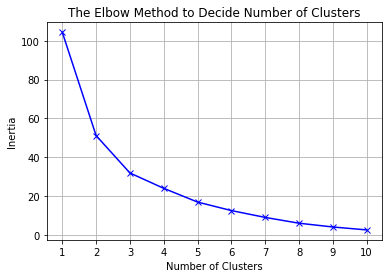

In [8]:
# Finding the best number of cluster for dissect profiles
elbow(dissect_profiles)

# Embedding Visualizations

In [9]:
# Apply PCA to embed the models into a low dimensional space based on found concepts in eahc model
components, pca = compute_embedding(dissect_profiles)

In [10]:
# Plot Learned Concepts Embedding (LCE)
# Imports
import plotly.express as px
fig = px.scatter_3d(components, x='pca1', y='pca2', z='pca3', color="model")
fig.show()

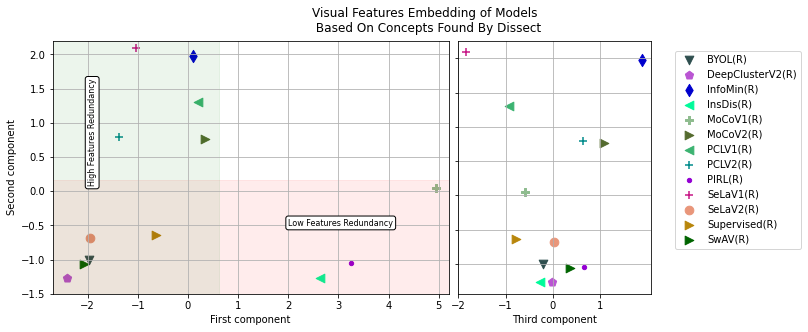

In [11]:
# Plot Learned Concepts Embedding (LCE)
plot_embedding(dissect_profiles, components)

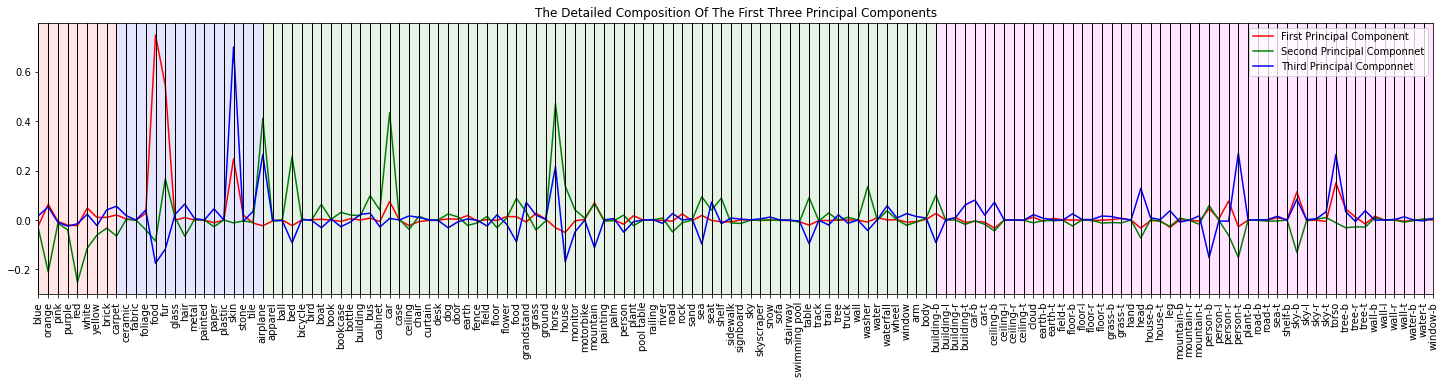

In [12]:
# Plot Learned Concepts Embedding (LCE) PCA Components
plot_embedding_coefficients(dissect_profiles, pca)

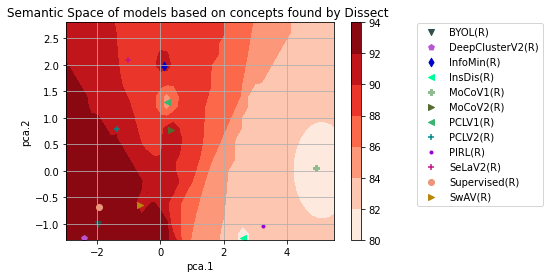

In [15]:
plot_embedding_performance(components, performance_data, "dt_CIFAR10")